In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [7]:
df = pd.read_csv('/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

We can observe that there are no missing values in the data set, some categorical variables too that need to be encoded.

In [9]:
columns = ['RowNumber','CustomerId', 'Surname']
df = df.drop(columns, axis = 1)

We have removed the unnecessary columns.

In [10]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


Knowing more about the Data

In [11]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [13]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [14]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [15]:
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [16]:
df['Card Type'].value_counts()

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

In [17]:
df['Complain'].value_counts()

Complain
0    7956
1    2044
Name: count, dtype: int64

In [18]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [19]:
columns = [
    'Gender', 'Geography', 'Tenure',
    'NumOfProducts', 'HasCrCard', 'IsActiveMember',
    'Complain', 'Satisfaction Score', 'Card Type'
]

Visualizing the Data Graphically 

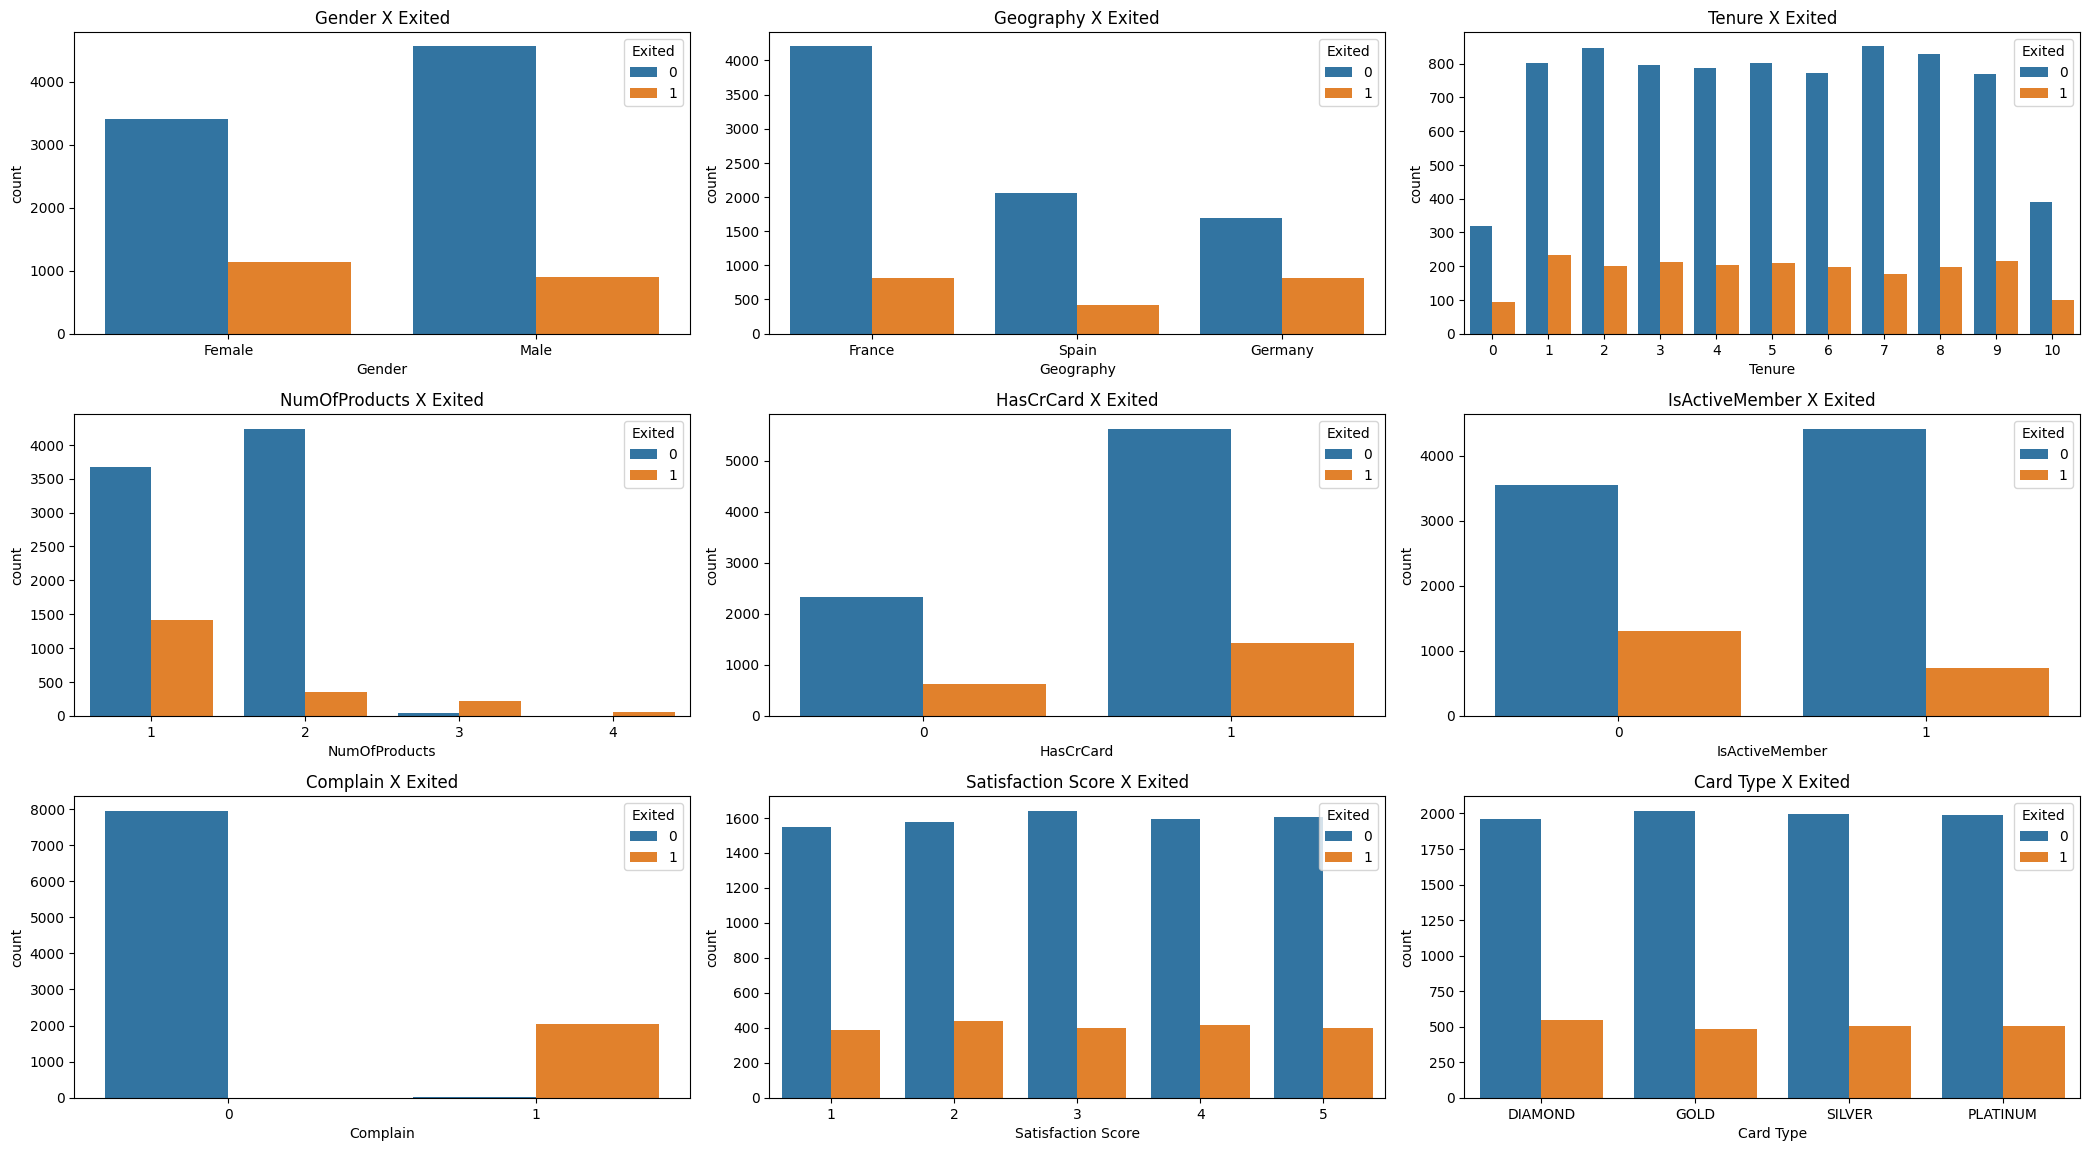

In [20]:
fig, axes = plt.subplots(4, 3, figsize=(21,15))
axes = axes.flatten() 
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, hue='Exited', ax=axes[i])
    axes[i].set_title(f'{col} X Exited')
for j in range(i + 1, len(axes)):
     fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

Observations:
1. Female customers has exited more than their male counterparts.
2. In France, the bank has the highest number of   customers.
3. Those who have credited card have exited more
4. Active Members have exited more.
5. All those who had complaints, exited means poor redressal of complaints.
6. People with high satisfaction score have exited equal to those with a lower satisfaction score.
7. Platinum card holders are also exitting in same number as the ones with lower coveted status cards.

In [21]:
df['Satisfaction Score']

0       2
1       3
2       3
3       5
4       5
       ..
9995    1
9996    5
9997    3
9998    2
9999    3
Name: Satisfaction Score, Length: 10000, dtype: int64

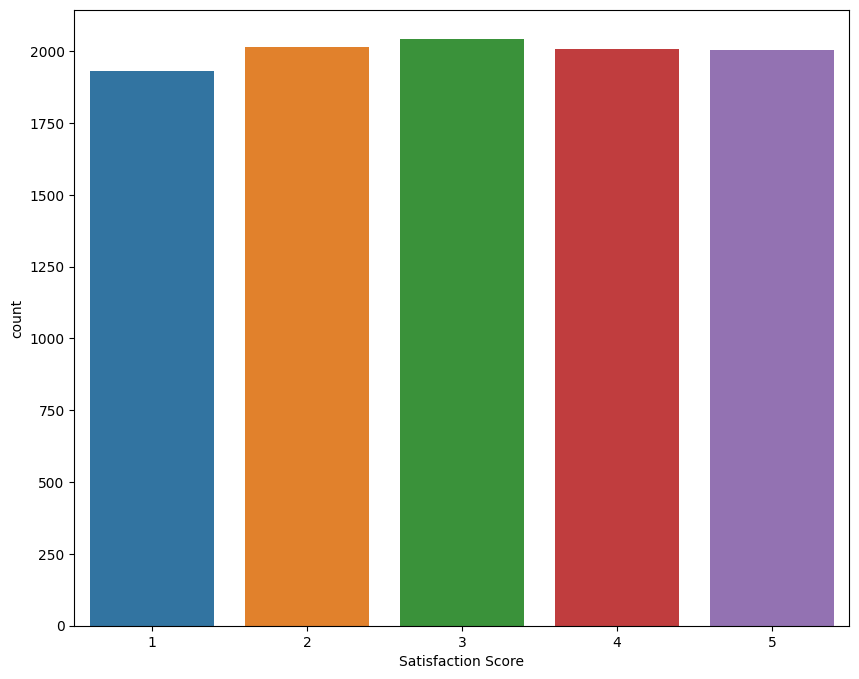

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(df, x='Satisfaction Score')
plt.title('')
plt.show()

**All satisfaction scores have more or less the same number of customers, implies hat services are quite balanced.**

In [23]:
gender = {"Female": 0,
          "Male": 1}
df['Gender'] = df['Gender'].map(gender)

Geography = {
    'France': 1,
    'Spain': 2,
    'Germany':3
}
df['Geography'] = df['Geography'].map(Geography)


Card_Type = {
    'DIAMOND': 1,
    'PLATINUM': 2,
    'GOLD': 3,
    'SILVER': 4
}
df['Card Type'] = df['Card Type'].map(Card_Type)


Correlation matrix is : 


<Axes: >

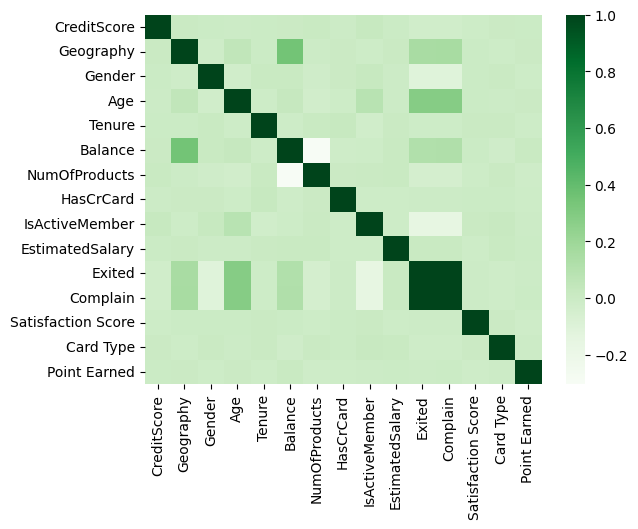

In [24]:
matrix = df.corr()
print("Correlation matrix is : ")
sns.heatmap(matrix, cmap="Greens")

**Not many positive or negative correlations are seen with exited, just Geography, gender, Age and balance show small correlations.**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  int64  
 2   Gender              10000 non-null  int64  
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  int64  
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 1.1 MB


In [26]:
df['Age_range'] = pd.cut(df.Age,
                         bins=[0, 24, 34, 44, 54, 64, 100], 
                         labels=[ 'Young Adult', 'Young Adult', 'Middle Adult', 'Mature Adult', 'Older Adult', 'Elderly'], ordered=False)

In [27]:
df.drop('Age', axis = 1, inplace=True)


In [28]:
df['Age_range'] = df['Age_range'].map({'Young Adult' : 1, 'Middle Adult': 2, 'Mature Adult' : 3, 'Older Adult':4, 'Elderly' : 5})

In [29]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [30]:
X

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Age_range
0,619,1,0,2,0.00,1,1,1,101348.88,1,2,1,464,2
1,608,2,0,1,83807.86,1,0,1,112542.58,1,3,1,456,2
2,502,1,0,8,159660.80,3,1,0,113931.57,1,3,1,377,2
3,699,1,0,1,0.00,2,0,0,93826.63,0,5,3,350,2
4,850,2,0,2,125510.82,1,1,1,79084.10,0,5,3,425,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,5,0.00,2,1,0,96270.64,0,1,1,300,2
9996,516,1,1,10,57369.61,1,1,1,101699.77,0,5,2,771,2
9997,709,1,0,7,0.00,1,0,1,42085.58,1,3,4,564,2
9998,772,3,1,3,75075.31,2,1,0,92888.52,1,2,3,339,2


In [31]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 69)

In [33]:
y_train

7637    0
1475    0
6540    0
6164    0
1353    0
       ..
4374    0
8631    0
9818    0
4041    0
7371    0
Name: Exited, Length: 8000, dtype: int64

**We use Random Forest Classifier, for high accuracy.**

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [35]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
y_pred = rf.predict(X_test)

In [37]:
y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9985


In [39]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1577    1]
 [   2  420]]


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1578
           1       1.00      1.00      1.00       422

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



**We use logistic Regression as the second method which is expected to be less accurate.**

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [46]:
y_pred

array([1, 1, 0, ..., 0, 0, 1])

In [47]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.864


**A lower accuracy than random forest classifier. It can be improved using proper scaling of the input dataset and hyperparameter tuning using Gridseach and Random search.**

In [48]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1491   87]
 [ 185  237]]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1578
           1       0.73      0.56      0.64       422

    accuracy                           0.86      2000
   macro avg       0.81      0.75      0.78      2000
weighted avg       0.86      0.86      0.86      2000



In [50]:
! pip install shap
import shap

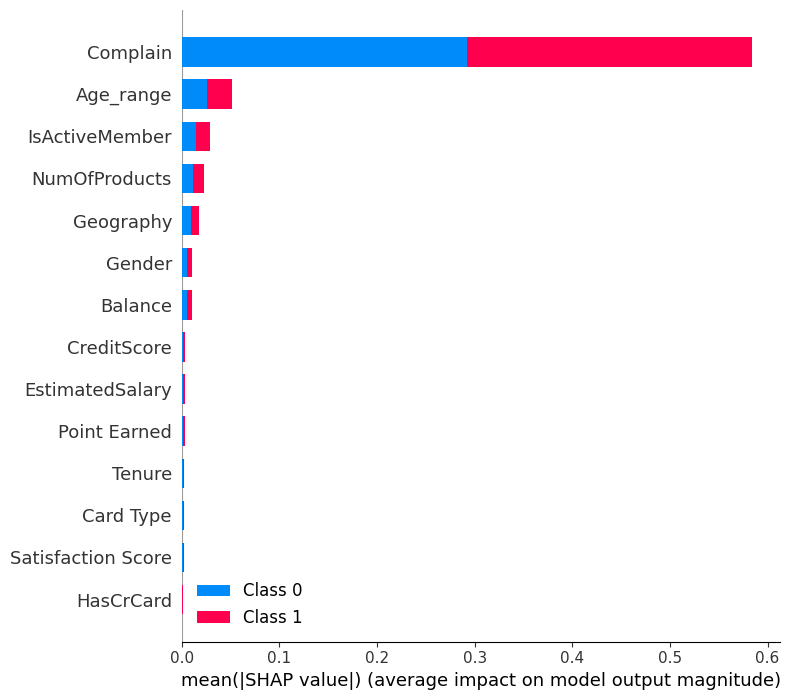

In [51]:
explainer = shap.Explainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)